<h1>Iris flower prediction</h1>
<h4>Importing libraries</h4>
Numpy, pandas, seaborn, matplotlib & sklearn (Sklearn later on). You can refer this to the assessment document.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time    # this is an inbuilt library in Python

<h4>Load IRIS data from csv (Data cleaning/sorting)</h4>

In [5]:
irisCSV = 'iris.csv'

First, we need to understand the data, we need to load the iris.csv to make it readable and understand the dataset.

In [6]:
iris  = pd.read_csv(irisCSV)
iris.shape

(149, 5)

Next need to load the 149 samples and the 5 labels. However later on it will be 150 due to the columns will push down the first set of data.

In [7]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


<h4>Create column names</h4>

In [8]:
col_name = ['sepal-lenght','sepal-width','petal-lenght','petal-width','Species']

<h4>Read from csv and added the column from above</h4>

In [9]:
iris  = pd.read_csv(irisCSV, names = col_name)

First, we need to understand the data, we need to load the iris.csv to make it readable and understand the dataset.

In [10]:
iris.shape

(150, 5)

In [11]:
iris.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Check statistic of the dataset

In [12]:
iris.describe()

,sepal-lenght,sepal-width,petal-lenght,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Verify features, this will allow us to see all the datatype.

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-lenght  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-lenght  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.head(10)

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [16]:
iris.head(150)

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
iris.head(1000)

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
iris.tail()

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
iris.tail(150)

,sepal-lenght,sepal-width,petal-lenght,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


.value_counts allow us to understand what is the first element is the most frequently occuring elements, however this exclude NA values.

In [20]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Visualizing species with features using sns.pairplot to use to analyse relationship between different species and 4 different features, this pairplot is useful to allow us to visualize all of the features from the dataset into one image.

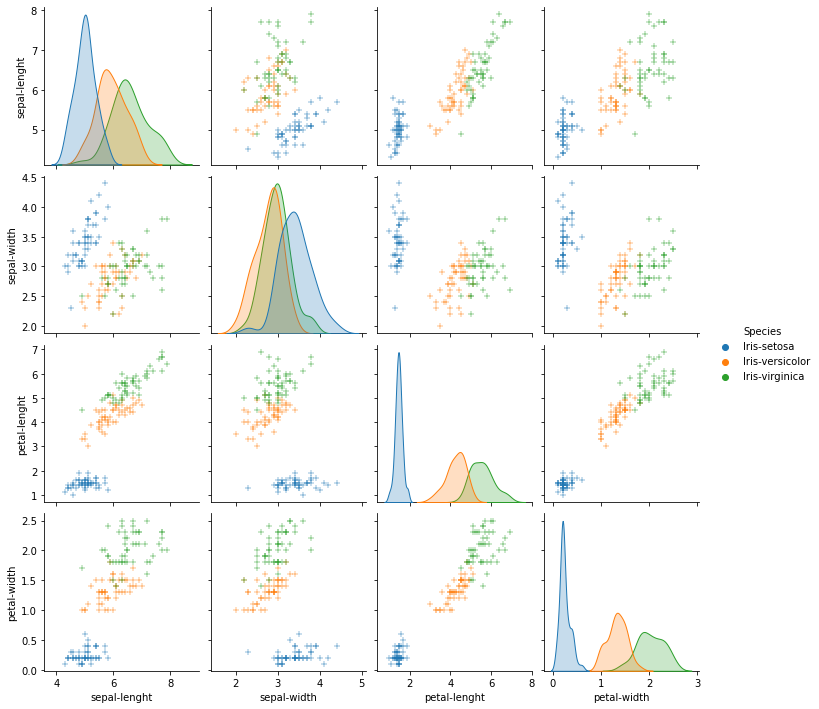

In [21]:
sns.pairplot(iris, hue='Species', markers='+')
plt.show()

Heatmap can help us visualize any correlation.

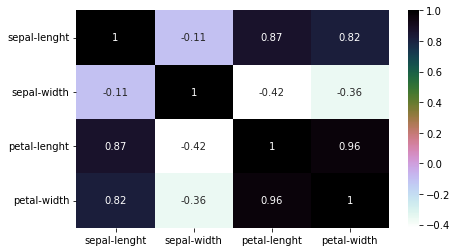

In [22]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

Histogram is also a good method to visualize features.

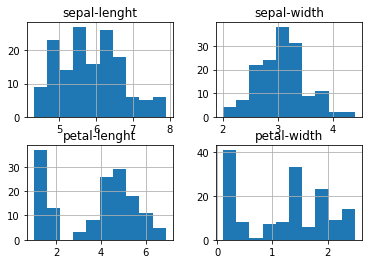

In [23]:
iris.hist()
plt.show()

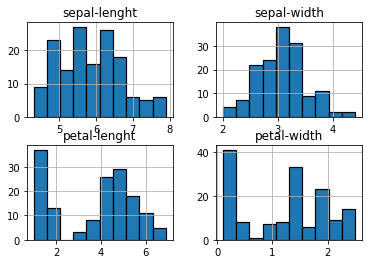

In [24]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()

plt.show()

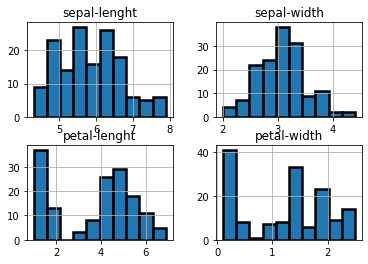

In [25]:
iris.hist(edgecolor='black', linewidth=2.5)
fig=plt.gcf()

Plot to visualize the distribution

<AxesSubplot:xlabel='sepal-lenght', ylabel='sepal-width'>

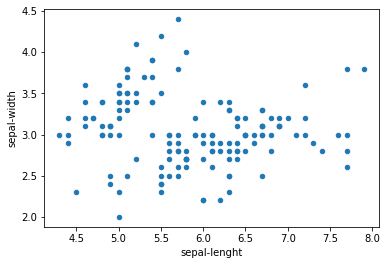

In [26]:
iris.plot(kind="scatter", x="sepal-lenght", y="sepal-width")

FaceGrid is better to understand compare the plot method.

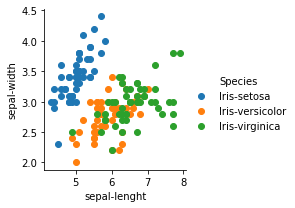

In [27]:
sns.FacetGrid(iris, hue="Species") \
   .map(plt.scatter, "sepal-lenght", "sepal-width") \
   .add_legend()

Using violin plot to visualize the density of the wwidth and length of each species. 

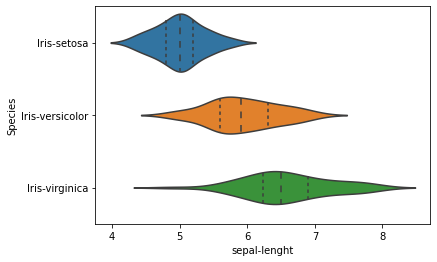

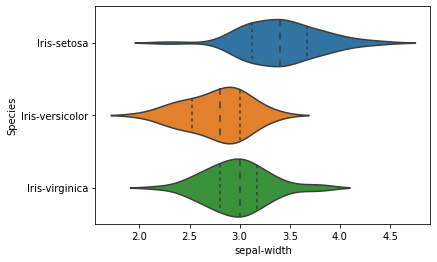

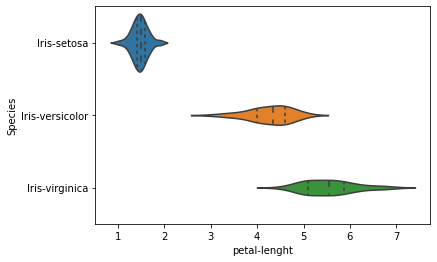

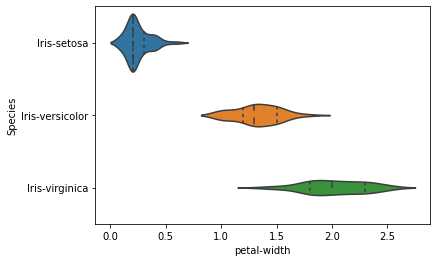

In [28]:
sns.violinplot(y='Species', x='sepal-lenght', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='sepal-width', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='petal-lenght', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='petal-width', data=iris, inner='quartile')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

Modelling the algorithm by skikit-learn & splitting the data

In [30]:
X = iris.drop(['Species'], axis=1)
y = iris['Species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


using the sklearn model the train test split which the test size is 20%, and the training size will be 80%

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

Return the rows from y_train

In [32]:
y_train.head()

14         Iris-setosa
24         Iris-setosa
139     Iris-virginica
58     Iris-versicolor
8          Iris-setosa
Name: Species, dtype: object

In [33]:
X_train.head()

,sepal-lenght,sepal-width,petal-lenght,petal-width
14,5.8,4.0,1.2,0.2
24,4.8,3.4,1.9,0.2
139,6.9,3.1,5.4,2.1
58,6.6,2.9,4.6,1.3
8,4.4,2.9,1.4,0.2


In [34]:
y_test.head()

47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object

In [35]:
y_test.head()

47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object

<h3>Creating the model</h3>
Import algorithm from sklearn, and define the time which is used for finding hoow long it takes to complete the algorithm.

In [36]:
from sklearn import svm

start_time = time.time()

SVM_classifier = svm.SVC()
SVM_classifier.fit(X_train, y_train)
SVM_prediction = SVM_classifier.predict(X_test)
print('SVM Accu:', metrics.accuracy_score(SVM_prediction,y_test))

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

SVM Accu: 0.9666666666666667
Execution time:  0.008977413177490234 secs


In [37]:
from sklearn.svm import SVC

start_time = time.time()

SVC_classifier = svm.SVC(gamma='auto')
SVC_classifier.fit(X_train, y_train)
SVC_prediction = SVC_classifier.predict(X_test)
print('SVC Accu:', metrics.accuracy_score(SVC_prediction,y_test))

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

SVC Accu: 1.0
Execution time:  0.023938894271850586 secs


In [38]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()

DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)
DT_prediction = DT_classifier.predict(X_test)
print('DT Accu:',metrics.accuracy_score(DT_prediction,y_test))

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

DT Accu: 1.0
Execution time:  0.011967658996582031 secs


In [39]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

KNN_classifier = KNeighborsClassifier(n_neighbors=8)
KNN_classifier.fit(X_train, y_train)
KNN_prediction=KNN_classifier.predict(X_test)
print('KNN Accu:',metrics.accuracy_score(KNN_prediction,y_test))

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

KNN Accu: 1.0
Execution time:  0.019945144653320312 secs


In [40]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
NB_prediction=NB_classifier.predict(X_test)
print('NB Accu:',metrics.accuracy_score(NB_prediction,y_test))

end_time = time.time()
print("Execution time: ", end_time - start_time,"secs")

NB Accu: 0.9666666666666667
Execution time:  0.01148223876953125 secs


<h3>Get all accuracy value from the models</h3>
Get all accuracy values from the models that we created, and we use the classification report fuction to represent the precision, recall f1-score and support.

**Precision:** Number of true postiive that was correctly labelled.
**Recall:** Number of correct positive that it predicts that COULD made.
**F1-Score:** a "harmonic" mean of precision and recall, if the score is 1.0 then its the best outcome and the worst is 0.0.
**Support:** Number of actual occurences.

In [41]:
print('SVM Accu:', metrics.accuracy_score(SVM_prediction,y_test))
print('SVC Accu:', metrics.accuracy_score(SVC_prediction,y_test))
print('DT Accu:',metrics.accuracy_score(DT_prediction,y_test))
print('KNN Accu:',metrics.accuracy_score(KNN_prediction,y_test))
print('NB Accu:',metrics.accuracy_score(NB_prediction,y_test))

SVM Accu: 0.9666666666666667
SVC Accu: 1.0
DT Accu: 1.0
KNN Accu: 1.0
NB Accu: 0.9666666666666667


In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(f'Classification Report: \n {classification_report(y_test, SVM_prediction)}')
print(f'Test Accuracy: {accuracy_score(y_test, SVM_prediction)}')

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Test Accuracy: 0.9666666666666667


In [43]:
print(f'Classification Report: \n {classification_report(y_test, SVC_prediction)}')
print(f'Test Accuracy: {accuracy_score(y_test, SVC_prediction)}')

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Test Accuracy: 1.0


In [44]:
print(f'Classification Report: \n {classification_report(y_test, DT_prediction)}')
print(f'Test Accuracy: {accuracy_score(y_test, DT_prediction)}')

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Test Accuracy: 1.0


In [45]:
print(f'Classification Report: \n {classification_report(y_test, KNN_prediction)}')
print(f'Test Accuracy: {accuracy_score(y_test, KNN_prediction)}')

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Test Accuracy: 1.0


In [46]:
print(f'Classification Report: \n {classification_report(y_test, NB_prediction)}')
print(f'Test Accuracy: {accuracy_score(y_test, NB_prediction)}')

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Test Accuracy: 0.9666666666666667
